# PCA

A teoria da análise em componentes principais está didáticamente explicada no artigo de Shlens (2014). 

Leitura recomendada:

Jonathon Shlens - A Tutorial on Principal Component Analysis, 2014

[arXiv:1404.1100v1](https://arxiv.org/abs/1404.1100v1)


Iremos primeiramente criar um exemplo para aplicar a PCA e depois aplicaremos a um exemplo com dados reais.

Criamo abaixo com núvemo com $N$ pontos gerados aleatóriamente com maior dispersão ao longo da diagonal.

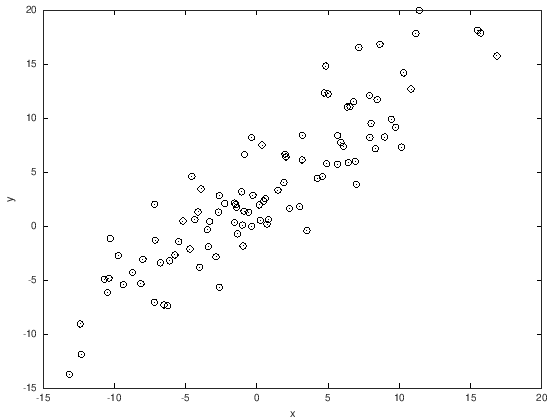

In [1]:
N = 100;
r(1,:) = 2 + 10*randn(1,N);
r(2,:) = 2 + 2*randn(1,N);
R = [cos(pi/4) -sin(pi/4); sin(pi/4) cos(pi/4)];
X = R*r;
plot(X(1,:),X(2,:),'ko'); xlabel ('x'); ylabel ('y');

Neste exemplo simples com apenas 2 dimensões, podemos visualmente identificar quais são as componentes principais (PCs) e qual é a ordem de importância delas. Em exemplos multidimensionais não é possível fazer tal análise visual. 

Para calcular as componentes principais iremos utilizar o código de Shlens (2014). O código a seguir está disponível no artigo e, a ele, foi acrescentada a normalização de variância (em stuações em que as diferentes dimensões dos dados expressam valores com ordem de grandeza diferentes, é necessário realizar a normalização do dados, para que não ocorra a dominância de uma dimensão sobre as demais).

In [2]:
function [signals,PC,V,mn,sm] = pca1(data)
% PCA1: Perform PCA using covariance.
%    data - MxN matrix of input data
%           (M dimensions, N trials)
% signals - MxN matrix of projected data
%      PC - each column is a PC
%       V - Mx1 matrix of variances
%      mn - mean for each dimension
%      sm - std for each dimension
  [M,N] = size(data);
  % subtract off the mean for each dimension
  mn = mean(data,2);
  data = data - mn;
  % variance normalization
  sm = std(data,[],2);
  data = data ./ sm;
  % calculate the covariance matrix
  covariance = 1 / (N-1) * data * data';
  % find the eigenvectors and eigenvalues
  [PC, V] = eig(covariance);
  % extract diagonal of matrix as vector
  V = diag(V);
  % sort the variances in decreasing order
  [junk, rindices] = sort(-1*V);
  V = V(rindices);                     
  PC = PC(:,rindices);
  % project the original data set
  signals = PC'*data;
endfunction

Abaixo utilizamos a função ```pca1```. Ela retorna os dados projetados nas componentes principais (```signals```), as componentes principais (```PC```), a variância associada a cada componente princial (```V```), a média (```mu```) e o desvio padrão (```sm```) de cada dimensão dos dados.

O produto escalar entre PC1 e PC2 é igual a 0.0, e portanto são ortogonais.
A variância associada à primeira componente princial é 0.95


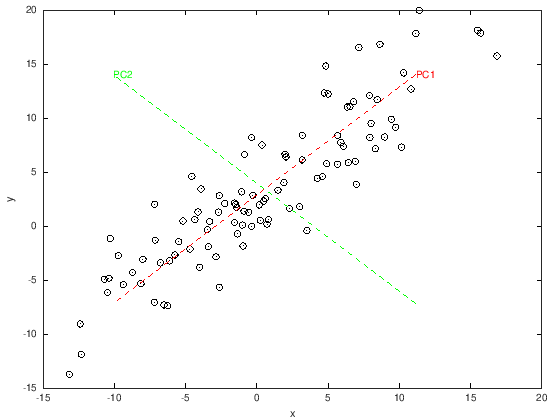

In [3]:
[signals, PC, V, mu, sig] = pca1(X);

plot(X(1,:),X(2,:),'ko'); xlabel ('x'); ylabel ('y'); hold on;

scale = 15;
pc1 = line([mu(1) - scale * PC(1,1) mu(1) + scale * PC(1,1)], [mu(2) - scale * PC(2,1) mu(2) + scale * PC(2,1)]);
pc2 = line([mu(1) - scale * PC(1,2) mu(1) + scale * PC(1,2)], [mu(2) - scale * PC(2,2) mu(2) + scale * PC(2,2)]);
text(mu(1) - scale * PC(1,1), mu(2) - scale * PC(2,1), 'PC1','color',[1 0 0]);
text(mu(1) + scale * PC(1,2), mu(2) + scale * PC(2,2), 'PC2','color',[0 1 0]);
set(pc1, 'color', [1 0 0], "linestyle", "--");
set(pc2, 'color', [0 1 0], "linestyle", "--");

printf('O produto escalar entre PC1 e PC2 é igual a %.1f, e portanto são ortogonais.\n', dot(PC(:,1),PC(:,2)));
va = cumsum(V) / sum(V);
printf('A variância associada à primeira componente princial é %.2f\n',va(1));

Vamos realizar a projeção dos dados nas componentes principais (iremos obeter o mesmo resultado já armazenado na variável ```signals```, a menos da normalização de variância que abaixo não está sendo aplicada). Note que a linha abaixo é a mesma que a última linha da função ```pca1```, porém na função a projeção está sendo realizada com os dados normalizados.

In [4]:
% projeção dos dados 
Xp = PC' * (X - mu);
size(X), size(mu)

ans =

     2   100

ans =

   2   1



Note que ```X``` e ```mu``` possuem dimensões diferentes, entretando o número de linhas é igual. Ao realizar ```X - mu``` (no GNU Octave) é realizado um *broadcast* do operador (subtração, no casa em tela). Outra opção é utilizar a função ```bsxfun``` conforme a seguir: ```bsxfun(@minus, X, mu)```. Alternativamente, podemos gerar uma matriz com o mesmo tamanho com os valores a serem subtraídos: ```X - repmat(mu,1,size(X,2))```. O mesmo é válido para a soma, podemos aplicar alguma das formas expostas anteriormente.

Agora iremos elimiar a informação da segunda componente principal e aplicar a transformação inversa (note que, se nenhum informação for eliminada, podemos aplicar a transformação inversa e encontrar os dados originais novamente).

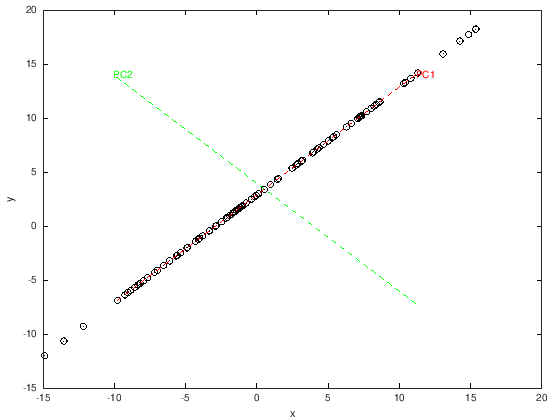

In [5]:
Xp1 = Xp; Xp1(2,:) = zeros(1,size(Xp,2));
% reconstrução
Xr = PC * Xp1 + mu;
plot(Xr(1,:),Xr(2,:),'ko'); xlabel ('x'); ylabel ('y'); 

scale = 15;
pc1 = line([mu(1) - scale * PC(1,1) mu(1) + scale * PC(1,1)], [mu(2) - scale * PC(2,1) mu(2) + scale * PC(2,1)]);
pc2 = line([mu(1) - scale * PC(1,2) mu(1) + scale * PC(1,2)], [mu(2) - scale * PC(2,2) mu(2) + scale * PC(2,2)]);
text(mu(1) - scale * PC(1,1), mu(2) - scale * PC(2,1), 'PC1','color',[1 0 0]);
text(mu(1) + scale * PC(1,2), mu(2) + scale * PC(2,2), 'PC2','color',[0 1 0]);
set(pc1, 'color', [1 0 0], "linestyle", "--");
set(pc2, 'color', [0 1 0], "linestyle", "--");

Mantendo agora apenas os informação projetada na segunda componente principal e realizando a reconstrução para o espaço original.

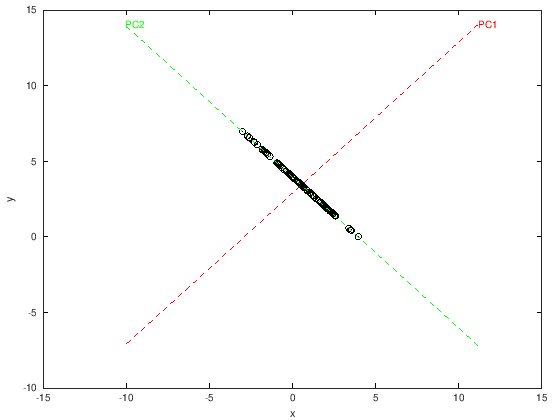

In [6]:
Xp2 = Xp; Xp2(1,:) = zeros(1,size(Xp,2));
% reconstrução
Xr = PC * Xp2 + mu;
plot(Xr(1,:),Xr(2,:),'ko'); xlabel ('x'); ylabel ('y'); 

scale = 15;
pc1 = line([mu(1) - scale * PC(1,1) mu(1) + scale * PC(1,1)], [mu(2) - scale * PC(2,1) mu(2) + scale * PC(2,1)]);
pc2 = line([mu(1) - scale * PC(1,2) mu(1) + scale * PC(1,2)], [mu(2) - scale * PC(2,2) mu(2) + scale * PC(2,2)]);
text(mu(1) - scale * PC(1,1), mu(2) - scale * PC(2,1), 'PC1','color',[1 0 0]);
text(mu(1) + scale * PC(1,2), mu(2) + scale * PC(2,2), 'PC2','color',[0 1 0]);
set(pc1, 'color', [1 0 0], "linestyle", "--");
set(pc2, 'color', [0 1 0], "linestyle", "--");

# Exemplo - Dados de Vinhos
    
Iremos utilizar agora os dados sobre vinhos disponíveis em 

http://archive.ics.uci.edu/ml/datasets/Wine

Dados:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data

Descrição dos dados:
http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.names

In [7]:
system('wget -O /tmp/wine.data http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data');

--2020-09-03 14:40:46--  http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10782 (11K) [application/x-httpd-php]
Saving to: ‘/tmp/wine.data’

/tmp/wine.data      100%[===================>]  10.53K  --.-KB/s    in 0.001s  

2020-09-03 14:40:47 (13.0 MB/s) - ‘/tmp/wine.data’ saved [10782/10782]



In [8]:
data = load('/tmp/wine.data');

In [9]:
whos data

Variables in the current scope:

   Attr Name        Size                     Bytes  Class
   ==== ====        ====                     =====  ===== 
        data      178x14                     19936  double

Total is 2492 elements using 19936 bytes



Segue abaixo um trecho da descrição dos dados:

    % These data are the results of a chemical analysis of
    % wines grown in the same region in Italy but derived from three
    % different cultivars.
    % The analysis determined the quantities of 13 constituents
    % found in each of the three types of wines. 
    %
    % Number of Instances
    %       class 1 59
    %       class 2 71
    %       class 3 48

Os dados possuem 14 colunas, sendo a primeira o rótulo (identificação da origem do vinho) e as demais colunas são atributos do vinho.

In [10]:
attributes = {'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', ...
                'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', ...
                'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline'};

Iremos organizar as informações dispondo os rótulos das amostras na variável ```label``` e as amostras na variável ```X```, de forma que tenhamos as amostras dispostas como colunas de ```X```.

In [11]:
classes = unique (data(:,1));
label = data(:,1);
X = data(:,2:end)';

Antes de proceder com o cálculo da PCA, vamos definir uma função para plotar os dados, utilizando marcadores e cores diferentes para cada classe.

In [14]:
function h = plotdata (x, y, l, labels)
  if nargin < 4, labels = {'ro','go','bo','rx','gx','bx','rd','gd','bd'}; endif;
  h = figure; hold on;
  ul = unique (l);
  for il=1:length(ul),
     id = find (l == ul(il));
     plot (x(id), y(id), labels{il}, 'markersize', 5, 'linewidth', 2);
  endfor;
  hold off;
endfunction

E por fim vamos aplicar a PCA aos dados e mostrar a representação considerando apenas as 2 primeiras componentes.

ans =  0.36199
ans =

 Columns 1 through 8:

   0.36199   0.55406   0.66530   0.73599   0.80162   0.85098   0.89337   0.92018

 Columns 9 through 13:

   0.94240   0.96170   0.97907   0.99205   1.00000



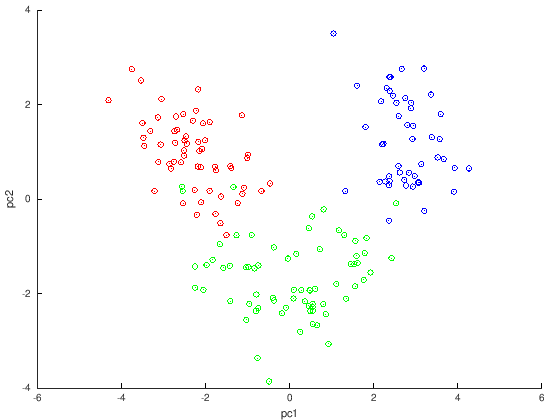

In [15]:
[signals, PC, V, mu, sig] = pca1(X);
V(1)/sum(V)
cumsum(V)'/sum(V)

plotdata (signals(1,:)', signals(2,:)', label);
xlabel ('pc1'); ylabel ('pc2');

Note na figura como podemos separar as amostras e determinar o cultivar dos vinhos analisando para tando as duas primeiras componentes principais. Faça outros testes: verifique o que ocorre se a PCA não realizar a normalização dos dados; verifique se algum conjunto 2 ou 3 atributos isoladamente é capaz de fornecer uma separação boa entre as classes.